# Access MongoDB

* Author: Johannes Maucher
* Last Update: 30.10.2017

## Prerequisites
For the experiments in this notebook MongoDB must be installed. It can be downloaded from [MongoDB Community Server Download](https://www.mongodb.com/download-center#community). After installation the MongoDB environment must be set up as described in the [MongoDB installation and setup tutorial](https://docs.mongodb.com/manual/tutorial). As described in this tutorial a data directory for MongoDB must be defined. In the case that the MongoDB data dirctory is `d:\test\mongodb\data`. Enter the following command in a shell in order to start the MongoDB server:

`"C:\Program Files\MongoDB\Server\3.4\bin\mongod.exe" --dbpath d:\test\mongodb\data`

The example data used in this notebook comes from [OpenFoodFacts](https://world.openfoodfacts.org/data). A MongoDB dump of this data can be downloaded from [MongoDB dump of OpenFoodFacts](http://world.openfoodfacts.org/data/openfoodfacts-mongodbdump.tar.gz). Decompress the downloaded archive and move the `.tsv` file to your MongoDB data directory. 

Apply the *mongoimport*-command to import the *.tsv*-dump into the MongoDB database by typing the following command into a shell:

`"C:\Program Files\MongoDB\Server\3.4\bin\mongoimport.exe" --db fooddata --type tsv --file d:\test\mongodb\data\en.openfoodfacts.org.products.tsv --ignoreBlanks --headerline`

Finally the `pymongo`- package must be installed, e.g. by `conda install pymongo`. Then the local *Open Food Facts-MongoDB* can be accessed as demonstrated in this notebook. [pymongo tutorial](http://api.mongodb.com/python/current/tutorial.html) provides a quick *pymongo*-introduction.  

## Access local Open Food Facts MongoDb

In [2]:
import pymongo
import pprint

Create MongoDB client and connect to the running MongoDB server:

In [3]:
from pymongo import MongoClient
client = MongoClient()

In [3]:
client = MongoClient('mongodb://localhost:27017/')

In [4]:
print client.address
print client.database_names()

('localhost', 27017)
[u'admin', u'fooddata', u'local']


Select the `fooddata`-database:

In [5]:
db = client['fooddata']

In MongoDB *collections* are like tables in other database types. A list of all collection names can be obtained as follows:

In [6]:
print db.name
print db.collection_names()

fooddata
[u'en.openfoodfacts.org.products']


## Access a database collection (a table of the database)
Create the interface to the collection (table):

In [7]:
coll=db.get_collection(u'en.openfoodfacts.org.products')

Determine the number of items in the collection (rows in the table):

In [8]:
coll.count()

356001

### Get items of the collection
Retrieve first element of the database:

In [9]:
firstItem=coll.find_one()
pprint.pprint(firstItem)

{u'_id': ObjectId('5a130a998e492a6f32864d3c'),
 u'brands': u"Ferme t'y R'nao",
 u'brands_tags': u'ferme-t-y-r-nao',
 u'code': 3087,
 u'countries': u'en:FR',
 u'countries_en': u'France',
 u'countries_tags': u'en:france',
 u'created_datetime': u'2016-09-17T09:17:46Z',
 u'created_t': 1474103866,
 u'creator': u'openfoodfacts-contributors',
 u'last_modified_datetime': u'2016-09-17T09:18:13Z',
 u'last_modified_t': 1474103893,
 u'product_name': u'Farine de bl\xe9 noir',
 u'quantity': u'1kg',
 u'states': u'en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded',
 u'states_en': u'To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to be completed,Characteristics to be completed

Each element of a collection is a Python dictionary. Hence, e.g. the attributes (keys) can be obtained as follows:

In [10]:
pprint.pprint(firstItem.keys())

[u'created_t',
 u'last_modified_datetime',
 u'code',
 u'states_tags',
 u'creator',
 u'url',
 u'countries_tags',
 u'countries',
 u'countries_en',
 u'brands_tags',
 u'states',
 u'created_datetime',
 u'last_modified_t',
 u'brands',
 u'states_en',
 u'_id',
 u'product_name',
 u'quantity']


Queries can be specified as key-value pairs. E.g. in order to retrieve one product from *Ferrero* the following command can be applied:

In [11]:
ferr1=coll.find_one({'brands' : 'Ferrero'})
pprint.pprint(ferr1)

{u'_id': ObjectId('5a130a998e492a6f32865287'),
 u'additives': u' [ milk-chocolate -> en:milk-chocolate  ]  [ chocolate -> en:chocolate  ]  [ sugar -> en:sugar  ]  [ cocoa-butter -> en:cocoa-butter  ]  [ butter -> en:butter  ]  [ cocoa-mass -> en:cocoa-mass  ]  [ mass -> en:mass  ]  [ skim-milk-powder -> en:skim-milk-powder  ]  [ milk-powder -> en:milk-powder  ]  [ powder -> en:powder  ]  [ butteroil -> en:butteroil  ]  [ lecithin-as-emulsifier -> en:lecithin-as-emulsifier  ]  [ as-emulsifier -> en:as-emulsifier  ]  [ emulsifier -> en:emulsifier  ]  [ soy -> en:soy  ]  [ vanillin -> en:vanillin  ]  [ an-artificial-flavor -> en:an-artificial-flavor  ]  [ artificial-flavor -> en:artificial-flavor  ]  [ flavor -> en:flavor  ]  [ hazelnuts -> en:hazelnuts  ]  [ sugar -> en:sugar  ]  [ palm-oil -> en:palm-oil  ]  [ oil -> en:oil  ]  [ wheat-flour -> en:wheat-flour  ]  [ flour -> en:flour  ]  [ whey -> en:whey  ]  [ milk -> en:milk  ]  [ lowfat-cocoa-powder -> en:lowfat-cocoa-powder  ]  [ coc

Name of the queried product:

In [12]:
pprint.pprint(ferr1['product_name'])

u'Fine Hazelnut Chocolates'


All items, which match a specified criteria, can be obtained by applying the `find({key:value})`-function on the collection-object. E.g. all items with brandname *Ferrero* can be obtained as follows:

In [13]:
ferrero=coll.find({'brands' : 'Ferrero' })
print "Number of found products: ",ferrero.count()
for p in ferrero:
    try:
        print p['product_name']
    except:
        print "WARNING! - PRODUCT NAME NOT AVAILABLE"

Number of found products:  117
Fine Hazelnut Chocolates
Rocher
Rocher, Fine Hazelnut Chocolates
Nutella
Nutella
Nutella
Nutella
Mon chéri
Nutella
Nutella
Pâte à tartiner
Nutella
Nutella
Nutella
Nutella
Nutella
Nutella
Nutella
Nutella
Nutella
K. BUENO T15
Kinder country
Cloche Ferrero
Graine de couscous moyenne
Graine de Couscous Moyen 1,5 Kg Ferrero
Couscous aux 4 épices
Couscous aux Épices et Petits Raisins
Polenta express
Harissa
Graine de Couscous Moyen
Graine de couscous fin
Graine de Couscous Fin 1 Kg Ferrero
Nutella B-ready
Grainde de couscous fin
Nutella
Duplo
Ferrero Küsschen
Ferrero Küsschen
Ferrero Rocher
Lapin Ferrero Rocher
Die Besten von Ferrero
Raffaello
Raffaello
Raffaello
kinder maxi
Duplo big pack 18+2
Die Besten Classic
Ferrero Küsschen Caramel 20er Geschenkverpackung
Grand Ferrero Rocher
Kinder Chocolate
Nutella & Go!
Kinder Surprise (x6) de Noël
Raffaello
Tic tac 100
Nutella +10% Gratuit,
Prestige
Ferrero Rocher
Ferrero Rocher
Mon chéri
Ferrero Rocher
Duplo Etui De 

It is quite common, that attribute values, e.g. productnames, are represented ambigously. For example in the current database, there are many different variations for the brandname `Ferrero`. Such variations can typically be catched by the application of *regular expressiong*. The `find()`-method on collection objects accepts regular expressions as demonstrated below. In this example all items are retrieved, which have *Ferrero* in their `brands`-attribute:

In [14]:
ferrero2=coll.find({'brands' : {'$regex':'.*Ferrero.*'} })
print "Number of found products: ",ferrero2.count()
for p in ferrero2:
    try:
        print p['brands'],"-"*10,p['product_name']
    except:
        print "WARNING! - PRODUCT NAME NOT AVAILABLE"

Number of found products:  417
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Mints, Candy Cane
Ferrero,  Ferrero Rocher ---------- Rocher, Hazelnut Chocolates
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Scary Sweets Mints, Grape & Cherry
Ferrero, Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Tic Tac
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Flavored Mints, Grape
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Candy Cane
Ferrero U.S.A.  Incorporated ---------- Flavored Mints
Ferrero U.S.A.  Incorporated ---------- Summer Ice Pop Mint
Ferrero U.S.A.  Incorporated ---------- Freshmints
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Fruit Mints
Ferrero U.S.A.  Incorporated ---------- Freshmints
Ferrero U.S.A.  Incorporated ---------- Mints
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Flavored Mints
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Mints
Tic Tac,  Ferrero U.S.A.  Incorporated ---------- Flavored Mints, Grrr...Een Apple
Tic Tac,  Ferrero U.S.A

More complex queries can be configured by applying logical operators and comparison symbols, such as `$and, $or`, `$gt` (greater then) and `$lt` (smaller then). E.g. in the next cell all products with more than 3000 kJ and more than 60g fat per 100g are obtained:  

In [15]:
heavy=coll.find(
{
     '$and': [
            { 'energy_100g' : { '$gt': 3000.0 } },
            { 'fat_100g'    : { '$gt': 60.0 } }
          ]
}
)

In [16]:
heavy.count()

4200

The `next()`-operator can be obtained to iterate through all items of a query-result:

In [17]:
for i in range(10): #list the first 10 items
    p=heavy.next()
    print '-'*10
    print p['product_name']
    print p['energy_100g']
    print p['fat_100g']

----------
Organic Sunflower Oil
3586
100
----------
Organic Extra Virgin Olive Oil
3586
100
----------
Organic Canola Oil Refined
3586
100
----------
Organic Unrefined Extra Virgin Coconut Oil
3586
100
----------
100% Pure Canola Oil
3586
100
----------
Imported Olive Oil
3347
93.33
----------
Extra Virgin Olive Oil
3347
93.33
----------
Olive Oil
3347
93.33
----------
Ventura, Soybean - Peanut Frying Oil Blend
3586
100
----------
Extra Virgin Olive Oil
3586
100


In order to retrieve all products with completed nutrition facts, the following query can be applied:

In [18]:
nutritionProds=coll.find({'states' : {'$regex':'.*en:nutrition-facts-completed.*'} })

In [19]:
nutritionProds.count()

309604

In [20]:
cats=coll.distinct('countries_tags')

Get all countries:

In [21]:
countries=set()
for c in cats:
    for s in c.split(','):
        countries.add(s)
print list(countries)[:20]
print len(countries)

[u'en:egypt', u'en:indonesia', u'en:guinea-bissau', u'en:switzerland', u'en:yemen', u'en:united-states', u'en:austria', u'en:greece', u'en:slovakia', u'en:french-polynesia', u'en:georgia', u'en:turkey', u'en:algeria', u'en:russia', u'fr:grande-bretagne', u'en:ukraine', u'en:oman', u'en:sri-lanka', u'en:el-salvador', u'en:poland']
224


Find all Products which are sold in Germany:

In [25]:
germanProds=coll.find({'countries' : {'$regex':'.*[gG]erman.*'} })
print germanProds.count()

714


In [26]:
germanProds.distinct('countries')[:20]

[u'Germany',
 u'United States,Germany',
 u'Germany,Switzerland',
 u'Germany,Spain',
 u'Germany,United Kingdom,United States',
 u'France,Germany',
 u'Germany,United States',
 u'Germany,Portugal,Spain',
 u'Germany, en:france,France',
 u'Germany,France',
 u'Belgium,France,Germany,Ireland,Netherlands,Portugal,Spain,United Kingdom',
 u'Belgique,France,Suisse, en:germany',
 u'France,Germany,Switzerland',
 u'Austria,France,Germany,Italy,Netherlands,Switzerland',
 u'Denmark,France,Germany,Hungary,Portugal,Serbia,Spain,Switzerland,United Kingdom',
 u'France, en:germany',
 u'Belgium,France,Germany,Italy,Netherlands,Portugal,Spain,Switzerland,United Kingdom',
 u'Germany, Suisse',
 u'Belgium,France,Germany,Switzerland',
 u'Australia,Czech Republic,France,Germany,Hungary']

## Import collection from MongoDB into Pandas dataframe

In [27]:
import pandas as pd

In [28]:
df=pd.DataFrame(list(germanProds))

In [31]:
print df.tail()

     -alpha-linolenic-acid_100g  -capric-acid_100g  -caprylic-acid_100g  \
709                         NaN                NaN                  NaN   
710                         NaN                NaN                  NaN   
711                         NaN                NaN                  NaN   
712                         NaN                NaN                  NaN   
713                         NaN                NaN                  NaN   

     -docosahexaenoic-acid_100g  -eicosapentaenoic-acid_100g  -lactose_100g  \
709                         NaN                          NaN            NaN   
710                         NaN                          NaN            NaN   
711                         NaN                          NaN            NaN   
712                         NaN                          NaN            NaN   
713                         NaN                          NaN            NaN   

     -lauric-acid_100g  -linoleic-acid_100g  -myristic-acid_100g  \
709   

In [29]:
df.shape

(714, 112)

### Define subset of relevant columns
In a first step all columns of the German dataframe, which have more than 500 values are determined:

In [32]:
relCols=[]
for c in df.columns:
    if df[c].dropna().count()>500:
        relCols.append(c)
print relCols

[u'_id', u'additives', u'additives_n', u'brands', u'brands_tags', u'carbohydrates_100g', u'categories', u'categories_en', u'categories_tags', u'code', u'countries', u'countries_en', u'countries_tags', u'created_datetime', u'created_t', u'creator', u'energy_100g', u'fat_100g', u'ingredients_from_palm_oil_n', u'ingredients_text', u'ingredients_that_may_be_from_palm_oil_n', u'last_modified_datetime', u'last_modified_t', u'main_category', u'main_category_en', u'nutrition-score-fr_100g', u'nutrition-score-uk_100g', u'nutrition_grade_fr', u'packaging', u'packaging_tags', u'pnns_groups_1', u'pnns_groups_2', u'product_name', u'proteins_100g', u'quantity', u'salt_100g', u'saturated-fat_100g', u'sodium_100g', u'states', u'states_en', u'states_tags', u'sugars_100g', u'url']


From the column subset generated above a further subset of interesting columns is manually configured:

In [33]:
relCols=[u'brands',u'product_name',u'main_category',u'energy_100g', u'fat_100g',u'proteins_100g',u'salt_100g',u'carbohydrates_100g',u'sugars_100g', u'sodium_100g', u'saturated-fat_100g']

Drop all rows of the German dataframe, which have non-values in the relevant columns:

In [34]:
dfclean=df[relCols].dropna()

### Descriptive Statistics and visualization
Calculate some descriptive statistics:

In [35]:
dfclean.describe()

,energy_100g,fat_100g,proteins_100g,salt_100g,carbohydrates_100g,sugars_100g,sodium_100g,saturated-fat_100g
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,1251.597639,15.797116,8.633433,0.852519,29.638734,14.521094,0.335632,6.537835
std,828.731115,18.379247,10.436273,2.160974,27.057874,19.500017,0.850757,8.744876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,398.750000,1.400000,2.125000,0.050000,5.125000,1.800000,0.019685,0.300000
50%,1366.500000,7.500000,6.100000,0.275000,16.600000,5.000000,0.108268,2.400000
75%,1866.500000,28.000000,11.000000,1.100000,55.925000,20.800000,0.433071,10.875000
max,3853.000000,99.900000,82.000000,35.560000,100.000000,100.000000,14.000000,65.800000


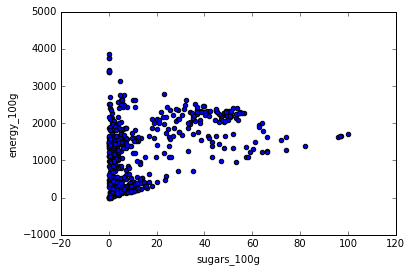

In [36]:
%matplotlib inline
from matplotlib import pyplot as plt
df.plot('sugars_100g','energy_100g',kind="scatter")
plt.show()

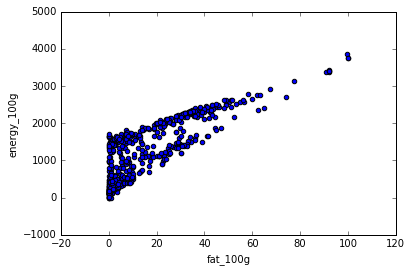

In [37]:
df.plot('fat_100g','energy_100g',kind="scatter")
plt.show()

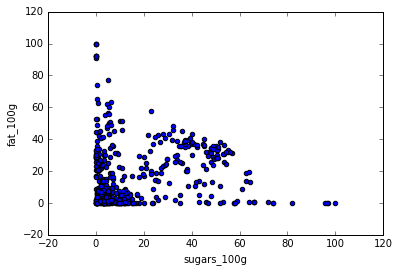

In [38]:
df.plot('sugars_100g','fat_100g',kind="scatter")
plt.show()

Interprete these plots!

In [43]:
dfclean.to_csv("germanProductSubset.csv",encoding="utf-8")